In [88]:
# 数据分析
import pandas as pd
import numpy as np
#由于在数据分析过程中需要绘制图案，以直观的分析数据，我们需要引入matplotlib和seaborn库。
# 绘图
import matplotlib.pyplot as plt
import seaborn as sns


In [89]:
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')


In [90]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [91]:
# 查看训练集详细信息
print(df_train.describe())


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [92]:
print(df_test.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


In [93]:
# 查看测试集详细信息
print(df_test.describe())


       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200


In [94]:
# 填充数据值
def fillna_data(df_train, df_test):
    # 对训练集和测试集中的"Age"数据进行平均值填充
    df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mean())
    df_test['Age'] = df_test['Age'].fillna(df_test['Age'].mean())
    # 添加一个新的类别"Missing"来填充"Cabin"
    df_train['Cabin'] = df_train['Cabin'].fillna('Missing')
    df_test['Cabin'] = df_test['Cabin'].fillna('Missing')
    # 用出现频率最多的类别填充训练集中的"Embarked"属性
    df_train['Embarked'] = df_train['Embarked'].fillna(
        df_train['Embarked'].mode()[0])
    # 用出现频率最多的类别填充测试集中的"Fare"属性
    df_test['Fare'] = df_test['Fare'].fillna(
        df_test['Fare'].mode()[0])

    return df_train, df_test

# 得到填充后的数据集 df_train， df_test
df_train, df_test = fillna_data(df_train, df_test)


C:\Users\10101\AppData\Local\Temp\ipykernel_22552\3295226332.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=df_train,
C:\Users\10101\AppData\Local\Temp\ipykernel_22552\3295226332.py:1: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': '0.1'}` instead.

  sns.barplot(x='Pclass', y='Survived', data=df_train,
C:\Users\10101\AppData\Local\Temp\ipykernel_22552\3295226332.py:1: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.2}` instead.

  sns.barplot(x='Pclass', y='Survived', data=df_train,


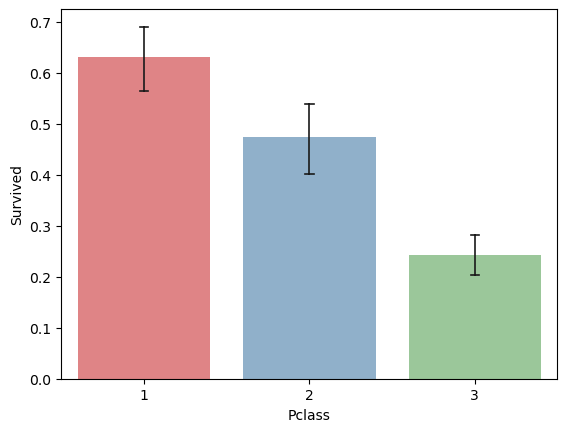

In [95]:
sns.barplot(x='Pclass', y='Survived', data=df_train,
            palette="Set1",
            errwidth=1.2,
            errcolor="0.1",
            capsize=0.05,
            alpha=0.6)
plt.show()


C:\Users\10101\AppData\Local\Temp\ipykernel_22552\4184909270.py:1: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': '0.1'}` instead.

  sns.barplot(x='Sex', y='Survived', data=df_train,
C:\Users\10101\AppData\Local\Temp\ipykernel_22552\4184909270.py:1: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.2}` instead.

  sns.barplot(x='Sex', y='Survived', data=df_train,


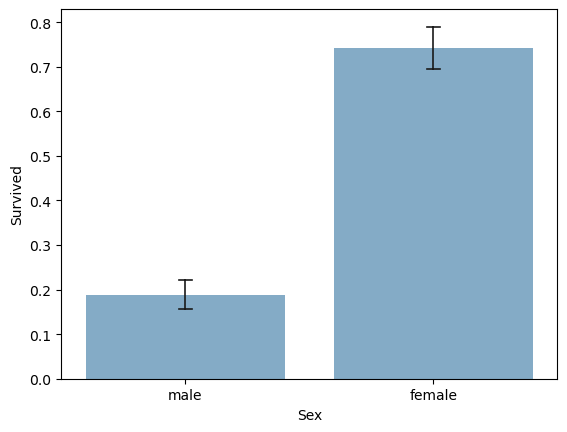

In [96]:
sns.barplot(x='Sex', y='Survived', data=df_train,
            capsize=0.05,
            errwidth=1.2,
            errcolor='0.1',
            alpha=0.6)
plt.show()


C:\Users\10101\AppData\Local\Temp\ipykernel_22552\3919036101.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(men[men['Survived'] == 1].Age,
C:\Users\10101\AppData\Local\Temp\ipykernel_22552\3919036101.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  _ax = sns.distplot(women[women['Survived'] == 

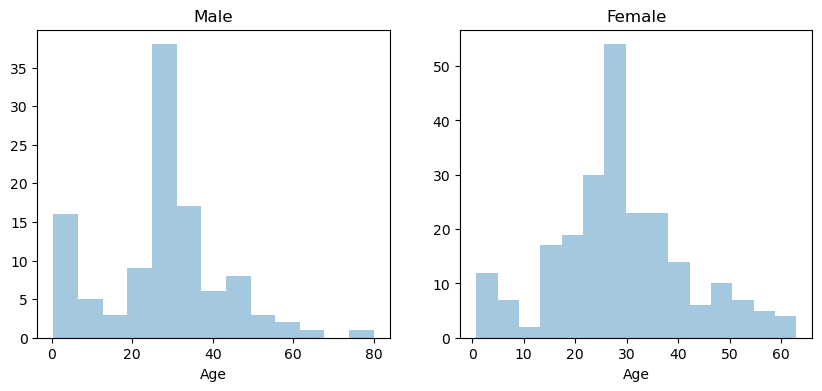

In [97]:
# 绘制不同年龄与性别的存活率
women = df_train[df_train["Sex"] == "female"]
men = df_train[df_train["Sex"] == "male"]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ax = sns.distplot(men[men['Survived'] == 1].Age,
                  label='Survived', ax=axes[0], kde=False)
ax.set_title('Male')

_ax = sns.distplot(women[women['Survived'] == 1].Age,
                   label='Survived', ax=axes[1], kde=False)
_ax.set_title('Female')

plt.show()


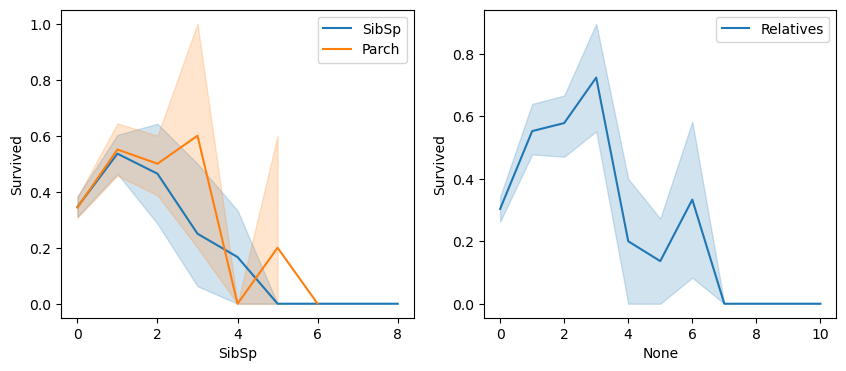

In [98]:
# 创建1行2列，大小为10*4的画布
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
# 乘客在船上的兄弟姐妹和父母小孩的数量与存活率的关系
ax = sns.lineplot(x='SibSp', y='Survived', data=df_train,
                  ax=axes[0], label='SibSp')
ax = sns.lineplot(x='Parch', y='Survived', data=df_train,
                  ax=axes[0], label='Parch')
# 将两个属性相加，更加方便分析
relatives = df_train['SibSp'] + df_train['Parch']
# 乘客在船上的亲属的数量与存活率的关系
_ax = sns.lineplot(x=relatives, y=df_train['Survived'],
                   ax=axes[1], label='Relatives')
plt.show()


In [99]:
# 统计登船港口的分类值
print(df_train['Embarked'].value_counts())


Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


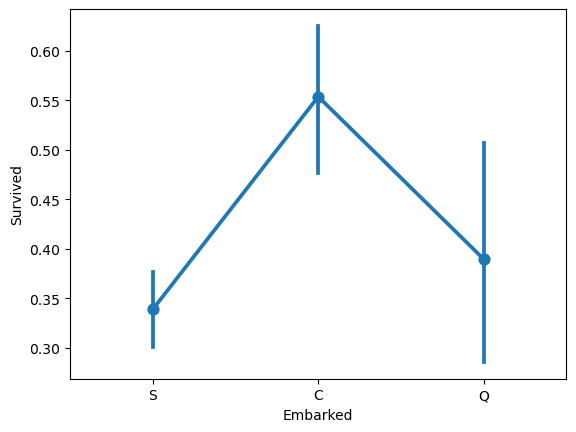

In [100]:
# 绘制各个港口登船的乘客的生存率
sns.pointplot(x='Embarked', y='Survived', data=df_train, order=None)
plt.show()


c:\Users\10101\anaconda3\envs\pytorch\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\10101\anaconda3\envs\pytorch\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': '0.1'}` instead.

  func(*plot_args, **plot_kwargs)
c:\Users\10101\anaconda3\envs\pytorch\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 1.2}` instead.

  func(*plot_args, **plot_kwargs)
c:\Users\10101\anaconda3\envs\pytorch\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variabl

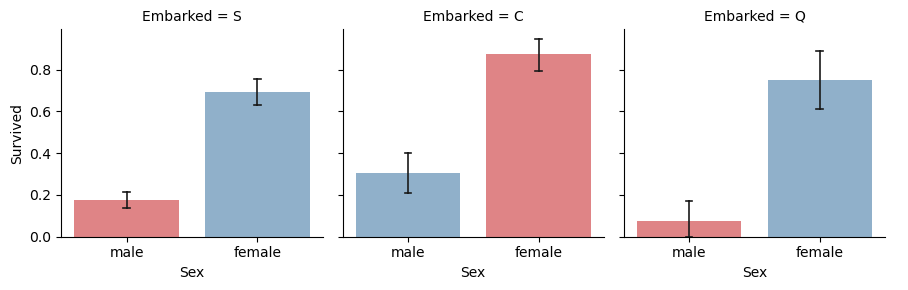

In [101]:
g = sns.FacetGrid(df_train, col='Embarked')
g.map(sns.barplot, 'Sex', 'Survived', data=df_train,
      palette="Set1",
      capsize=0.05,
      errwidth=1.2,
      errcolor='0.1',
      alpha=0.6,
      order=None)
# 添加图例
g.add_legend()
plt.show()


In [102]:
id_test = df_test.loc[:, 'PassengerId']


In [103]:
# 第一次处理
# 去掉了以下特征
# 即对 Pclass Sex Age SibSp Parch Embarked 分析
#df_train = df_train.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Fare'])
#df_test = df_test.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Fare'])


In [104]:
# 第二次处理
# 在第一次的基础上，添加了归一化处理的特征 Fare
# 即对 Pclass Sex Age SibSp Parch Fare Embarked 分析
#df_train = df_train.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
#df_test = df_test.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])


In [105]:
# 第三次处理
# 在第二次的基础上，去掉了特征 SibSp Parch
df_train = df_train.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch'])
df_test = df_test.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch'])


In [106]:
# 对数据集中的字符串数据进行编码处理
def preprocess_data(train, test):
    # 使用one-hot编码将登船港口"Embarked"进行转换
    # 训练集
    Embarked = pd.get_dummies(train['Embarked'], prefix='Embarked')
    tmp_train = pd.concat([train, Embarked], axis=1)
    tmp_train.drop(columns=['Embarked'], inplace=True)
    # 测试集
    Embarked = pd.get_dummies(test['Embarked'], prefix='Embarked')
    tmp_test = pd.concat([test, Embarked], axis=1)
    tmp_test.drop(columns=['Embarked'], inplace=True)
    # 将年龄归一化
    tmp_train['Age'] = (tmp_train['Age'] - tmp_train['Age'].min()) / (tmp_train['Age'].max() - tmp_train['Age'].min())
    tmp_test['Age'] = (tmp_test['Age'] - tmp_test['Age'].min()) / (tmp_test['Age'].max() - tmp_test['Age'].min())
    # 将船票价格归一化
    if 'Fare' in tmp_train.columns:
        tmp_train['Fare'] = (tmp_train['Fare'] - tmp_train['Fare'].min()) / (tmp_train['Fare'].max() - tmp_train['Fare'].min())
    if 'Fare' in tmp_test.columns:
        tmp_test['Fare'] = (tmp_test['Fare'] - tmp_test['Fare'].min()) / (tmp_test['Fare'].max() - tmp_test['Fare'].min())
    # 将性别"Sex"这一特征从字符串映射至数值
    # 0代表female，1代表male
    gender_class = {'female': 0, 'male': 1}
    tmp_train['Sex'] = tmp_train['Sex'].map(gender_class)
    tmp_test['Sex'] = tmp_test['Sex'].map(gender_class)
    
    return tmp_train, tmp_test


In [107]:
data_train, data_test = preprocess_data(df_train, df_test)


In [108]:
print(data_train.head())


   Survived  Pclass  Sex       Age      Fare  Embarked_C  Embarked_Q  \
0         0       3    1  0.271174  0.014151       False       False   
1         1       1    0  0.472229  0.139136        True       False   
2         1       3    0  0.321438  0.015469       False       False   
3         1       1    0  0.434531  0.103644       False       False   
4         0       3    1  0.434531  0.015713       False       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  


In [109]:
print(data_test.head())


   Pclass  Sex       Age      Fare  Embarked_C  Embarked_Q  Embarked_S
0       3    1  0.452723  0.015282       False        True       False
1       3    0  0.617566  0.013663       False       False        True
2       2    1  0.815377  0.018909       False        True       False
3       3    1  0.353818  0.016908       False       False        True
4       3    0  0.287881  0.023984       False       False        True


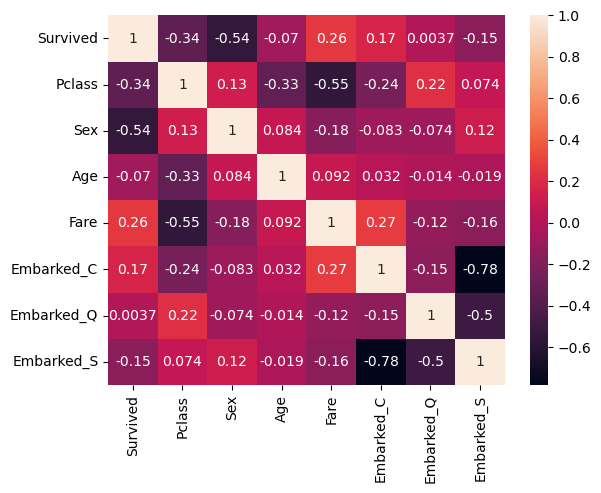

In [110]:
sns.heatmap(data_train.corr(), annot=True)
plt.show()



In [111]:
label_train = data_train.loc[:, 'Survived']
data_train = data_train.drop(columns=['Survived'])


In [112]:
from sklearn.model_selection import train_test_split
'''
从原始数据集（source）中拆分出训练数据集（用于模型训练train），测试数据集（用于模型评估test）
train_test_split是交叉验证中常用的函数，功能是从样本中随机的按比例选取train data和test data
train_data：所要划分的样本特征集
train_target：所要划分的样本结果
test_size：样本占比，如果是整数的话就是样本的数量
'''

# 建立模型用的训练数据集和测试数据集
train_X, test_X, train_y, test_y = train_test_split(data_train,
                                                    label_train,
                                                    train_size=.8)


In [113]:
from sklearn import svm
'''
 SVM函数参数解析：
 C:float, default=1.0
     正则化参数。正则化的强度与C成反比，必须是严格的正数。惩罚是一个平方的l2惩罚。
 gamma:{‘scale’, ‘auto’} or float, default=’scale’
     rbf'、'poly'和'sigmoid'的内核系数。
     如果gamma='scale'（默认）被执行，那么它使用1/（n_features * X.var()）作为gamma的值。
     如果是'auto'，则使用1/n_features。
 decision_function_shape:{‘ovo’, ‘ovr’}, default=’ovr’
     多分类问题选择'ovo'
'''

clf_SVM = svm.SVC(C=2, gamma=0.4, kernel='rbf')
# 训练SVM模型
clf_SVM.fit(train_X, train_y)



SVC(C=2, gamma=0.4)

In [114]:
from sklearn.metrics import confusion_matrix, classification_report

pred_SVM = clf_SVM.predict(test_X)

# 混淆矩阵
print(confusion_matrix(test_y, pred_SVM))


[[112   6]
 [ 25  36]]


In [115]:
'''
 classification_report函数用于显示主要分类指标的文本报告
 显示每个类的精确度，召回率，F1值等信息
 混淆矩阵 TP FP
          FN TN
'''
print(classification_report(test_y, pred_SVM))


              precision    recall  f1-score   support

           0       0.82      0.95      0.88       118
           1       0.86      0.59      0.70        61

    accuracy                           0.83       179
   macro avg       0.84      0.77      0.79       179
weighted avg       0.83      0.83      0.82       179



In [116]:
from sklearn.model_selection import cross_val_score

# 在训练集和测试集上的准确性
train_acc_SVM = cross_val_score(clf_SVM, train_X, train_y, cv=10, scoring='accuracy')
test_acc_SVM = cross_val_score(clf_SVM, test_X, test_y, cv=10, scoring='accuracy')

print('SVM Model on Train Data Accuracy: %f' %(train_acc_SVM.mean()))
print('SVM Model on Test Data Accuracy: %f' %(test_acc_SVM.mean()))


SVM Model on Train Data Accuracy: 0.807512
SVM Model on Test Data Accuracy: 0.815033


In [117]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# 初始化模型实例
svc = SVC()
# 定义多种参数
parameters = {
    'C': range(0, 21, 1),
    'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'kernel': ['rbf', 'linear']
}
# 暴力搜索调优
# 通过GridSearchCV函数可以根据给定的模型自动进行交叉验证，通过调节每一个参数来跟踪评分结果。
better_clf_SVM = GridSearchCV(svc, parameters, cv=5, n_jobs=8)
# 训练模型
better_clf_SVM.fit(train_X, train_y)


c:\Users\10101\anaconda3\envs\pytorch\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
100 fits failed out of a total of 2100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\10101\anaconda3\envs\pytorch\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\10101\anaconda3\envs\pytorch\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\10101\anaconda3\envs\pytorch\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constrai

GridSearchCV(cv=5, estimator=SVC(), n_jobs=8,
             param_grid={'C': range(0, 21),
                         'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1],
                         'kernel': ['rbf', 'linear']})

In [118]:
# 输出最优的模型的参数
print(better_clf_SVM.best_params_)


{'C': 6, 'gamma': 1, 'kernel': 'rbf'}


In [119]:
# 获取到最优的分类器
best_clf_SVM = better_clf_SVM.best_estimator_
print(better_clf_SVM.best_estimator_)
# 进行预测
best_pred_SVM = best_clf_SVM.predict(test_X)


SVC(C=6, gamma=1)


In [120]:
from sklearn.metrics import confusion_matrix, classification_report

print("Optimal SVM Model's Confusion Matrix:\n", confusion_matrix(test_y, best_pred_SVM))
print("Optimal SVM Model's Classification Report:\n", classification_report(test_y, best_pred_SVM))


Optimal SVM Model's Confusion Matrix:
 [[112   6]
 [ 24  37]]
Optimal SVM Model's Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.95      0.88       118
           1       0.86      0.61      0.71        61

    accuracy                           0.83       179
   macro avg       0.84      0.78      0.80       179
weighted avg       0.84      0.83      0.82       179



In [121]:
from sklearn.model_selection import cross_val_score

# 在测试集上的准确性
train_acc_best_SVM = cross_val_score(best_clf_SVM, train_X, train_y, cv=10, scoring='accuracy')
test_acc_best_SVM = cross_val_score(best_clf_SVM, test_X, test_y, cv=10, scoring='accuracy')

print('Optimal SVM Model on Train Data Accuracy: %f' %(train_acc_best_SVM.mean()))
print('Optimal SVM Model on Test Data Accuracy: %f' %(test_acc_best_SVM.mean()))
print('------------------------------------------------------')
print('Original SVM Model on Train Data Accuracy: %f' %(train_acc_SVM.mean()))
print('Original SVM Model on Test Data Accuracy: %f' %(test_acc_SVM.mean()))


Optimal SVM Model on Train Data Accuracy: 0.810329
Optimal SVM Model on Test Data Accuracy: 0.798366
------------------------------------------------------
Original SVM Model on Train Data Accuracy: 0.807512
Original SVM Model on Test Data Accuracy: 0.815033


In [122]:
from sklearn.ensemble import RandomForestClassifier

clf_RFC = RandomForestClassifier()# 未填参数，需调优
# 训练随机森林分类器模型
clf_RFC.fit(train_X, train_y)

#4.2.2模型预测
from sklearn.metrics import confusion_matrix, classification_report

pred_RFC = clf_RFC.predict(test_X)

# 混淆矩阵
print(confusion_matrix(test_y, pred_RFC))


[[104  14]
 [ 18  43]]


In [123]:
# 分类报告
print(classification_report(test_y, pred_RFC))


              precision    recall  f1-score   support

           0       0.85      0.88      0.87       118
           1       0.75      0.70      0.73        61

    accuracy                           0.82       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.82      0.82      0.82       179



In [124]:
from sklearn.model_selection import cross_val_score

# 在训练集和测试集上的准确性
train_acc_RFC = cross_val_score(clf_RFC, train_X, train_y, cv=10, scoring='accuracy')
test_acc_RFC = cross_val_score(clf_RFC, test_X, test_y, cv=10, scoring='accuracy')

print('Random Forest Classifier Model on Train Data Accuracy: %f' %(train_acc_RFC.mean()))
print('Random Forest Classifier Model on Test Data Accuracy: %f' %(test_acc_RFC.mean()))


Random Forest Classifier Model on Train Data Accuracy: 0.786365
Random Forest Classifier Model on Test Data Accuracy: 0.832353


In [125]:
keys = ['Pclass', 'Sex', 'Age', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
values = clf_RFC.feature_importances_
feature_importances_dict = dict(zip(keys, values))
print('=====随机森林算法中，各个特征的重要性=====')
for k, v in feature_importances_dict.items():
    print(f'{k}:{v*100:.2f}%')


=====随机森林算法中，各个特征的重要性=====
Pclass:9.13%
Sex:27.27%
Age:28.03%
Embarked_C:32.46%
Embarked_Q:1.59%
Embarked_S:0.63%


In [126]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# 初始化模型实例
rfc = RandomForestClassifier()
# 定义多种参数
parameters = {
    'n_estimators': range(10,71,10)
}
# 暴力搜索调优
# 通过GridSearchCV函数可以根据给定的模型自动进行交叉验证，通过调节每一个参数来跟踪评分结果。
better_clf_RFC = GridSearchCV(rfc, parameters, cv=5, n_jobs=8)
# 训练模型
better_clf_RFC.fit(train_X, train_y)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=8,
             param_grid={'n_estimators': range(10, 71, 10)})

In [127]:
# 输出最优的模型的参数
print(better_clf_RFC.best_params_)

# 获取到最优的分类器
best_clf_RFC = better_clf_RFC.best_estimator_
print(better_clf_RFC.best_estimator_)
# 进行预测
best_pred_RFC = best_clf_RFC.predict(test_X)


{'n_estimators': 20}
RandomForestClassifier(n_estimators=20)


In [128]:
from sklearn.metrics import confusion_matrix, classification_report

print("Optimal RFC Model's Confusion Matrix:\n", confusion_matrix(test_y, best_pred_RFC))
print("Optimal RFC Model's Classification Report:\n", classification_report(test_y, best_pred_RFC))


Optimal RFC Model's Confusion Matrix:
 [[103  15]
 [ 19  42]]
Optimal RFC Model's Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.86       118
           1       0.74      0.69      0.71        61

    accuracy                           0.81       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.81      0.81      0.81       179



In [129]:
from sklearn.model_selection import cross_val_score

# 在训练集和测试集上的准确性
train_acc_best_RFC = cross_val_score(best_clf_RFC, train_X, train_y, cv=10, scoring='accuracy')
test_acc_best_RFC = cross_val_score(best_clf_RFC, test_X, test_y, cv=10, scoring='accuracy')

print('Optimal RFC Model on Train Data Accuracy: %f' %(train_acc_best_RFC.mean()))
print('Optimal RFC Model on Test Data Accuracy: %f' %(test_acc_best_RFC.mean()))
print('------------------------------------------------------')
print('Original RFC Model on Train Data Accuracy: %f' %(train_acc_RFC.mean()))
print('Original RFC Model on Test Data Accuracy: %f' %(test_acc_RFC.mean()))


Optimal RFC Model on Train Data Accuracy: 0.792019
Optimal RFC Model on Test Data Accuracy: 0.827124
------------------------------------------------------
Original RFC Model on Train Data Accuracy: 0.786365
Original RFC Model on Test Data Accuracy: 0.832353


In [130]:
from sklearn.neural_network import MLPClassifier

# 两个隐藏层，第一层为64个神经元，第二层为32个神经元
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu',
                   solver='adam',
                   max_iter=800)
# 训练神经网络
mlp.fit(train_X, train_y)


MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=800)

In [131]:
from sklearn.metrics import confusion_matrix, classification_report

pred_BP = mlp.predict(test_X)

# 混淆矩阵
print(confusion_matrix(test_y, pred_BP))


[[111   7]
 [ 20  41]]


In [132]:
# 分类报告
print(classification_report(test_y, pred_BP))


              precision    recall  f1-score   support

           0       0.85      0.94      0.89       118
           1       0.85      0.67      0.75        61

    accuracy                           0.85       179
   macro avg       0.85      0.81      0.82       179
weighted avg       0.85      0.85      0.84       179



In [133]:
train_acc_BP = mlp.score(train_X, train_y)
test_acc_BP = mlp.score(test_X, test_y)

print('MLP Classifier Model on Train Data Accuracy: %f' %(train_acc_BP))
print('MLP Classifier Model on Test Data Accuracy: %f' %(test_acc_BP))


MLP Classifier Model on Train Data Accuracy: 0.831461
MLP Classifier Model on Test Data Accuracy: 0.849162


In [134]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# 两个隐藏层，第一层为128个神经元，第二层为64个神经元
mlp_0 = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=800)

parameters = {
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['lbfgs', 'sgd', 'adam']
}

better_mlp = GridSearchCV(mlp_0, parameters, cv=5, n_jobs=8)

better_mlp.fit(train_X, train_y)


GridSearchCV(cv=5,
             estimator=MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=800),
             n_jobs=8,
             param_grid={'activation': ['relu', 'tanh', 'logistic'],
                         'solver': ['lbfgs', 'sgd', 'adam']})

In [135]:
# 输出最优的模型的参数
print(better_mlp.best_params_)

# 获取到最优的分类器
best_mlp = better_mlp.best_estimator_
print(better_mlp.best_estimator_)
# 进行预测
best_pred_mlp = best_mlp.predict(test_X)


{'activation': 'relu', 'solver': 'adam'}
MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=800)


In [136]:
from sklearn.metrics import confusion_matrix, classification_report

print("Optimal BP Model's Confusion Matrix:\n", confusion_matrix(test_y, best_pred_mlp))


Optimal BP Model's Confusion Matrix:
 [[111   7]
 [ 22  39]]


In [137]:
print("Optimal BP Model's Classification Report:\n", classification_report(test_y, best_pred_mlp))


Optimal BP Model's Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.94      0.88       118
           1       0.85      0.64      0.73        61

    accuracy                           0.84       179
   macro avg       0.84      0.79      0.81       179
weighted avg       0.84      0.84      0.83       179



In [139]:
final_pred_SVM = best_clf_SVM.predict(data_test)
output_SVM = pd.DataFrame({'PassengerId': id_test, 'Survived': final_pred_SVM})
output_SVM.to_csv('./output/submission_SVM.csv', index=False)
print('submission_SVM.csv生成完毕！')


submission_SVM.csv生成完毕！


In [140]:
final_pred_RFC = best_clf_RFC.predict(data_test)
output_RFC = pd.DataFrame({'PassengerId': id_test, 'Survived': final_pred_RFC})
output_RFC.to_csv('./output/submission_RFC.csv', index=False)
print('submission_RFC.csv生成完毕！')


submission_RFC.csv生成完毕！


In [141]:
final_pred_BP = best_mlp.predict(data_test)
output_BP = pd.DataFrame({'PassengerId': id_test, 'Survived': final_pred_BP})
output_BP.to_csv('./output/submission_BP.csv', index=False)
print('submission_BP.csv生成完毕！')


submission_BP.csv生成完毕！
